In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
# Create a set of random latitude and longitude combinations 
lats = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
from citipy import citipy

In [5]:
# Add the latitudes and longitudes to a list 
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities 
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name 

    # If the city is unique, then add it to the cities list
    if city not in cities: 
        cities.append(city)

# Print the city count to confirm sufficient count 
len(cities)

629

In [7]:
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [9]:
import time 
from datetime import datetime 
import requests

In [10]:
# Create an empty list to hold the weather data 
city_data = []

# Print the beginning of the logging 
print("Beginning Data Retrieval           ")
print("-----------------------------------")

# Create counters 
record_count = 1
set_count = 1 

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&appid=" + weather_api_key + "&q=" + city.replace(" ","+") 

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    

Beginning Data Retrieval           
-----------------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | aksu
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | vila velha
Processing Record 7 of Set 1 | shaowu
Processing Record 8 of Set 1 | lavrentiya
Processing Record 9 of Set 1 | mapiri
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | muros
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | ambodifototra
City not found. Skipping...
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | kerteh
City not found. Skipping...
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | upernavik
Processing Record 21 o

In [11]:
len(city_data)

566

In [12]:
# Convert the array of dictionaries to a Pandas dataframe 
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,298.21,50,20,7.72,ZA,2023-01-12 14:49:39
1,Ushuaia,-54.8000,-68.3000,285.96,58,20,5.66,AR,2023-01-12 14:51:40
2,Aksu,41.1231,80.2644,267.71,91,100,4.21,CN,2023-01-12 14:51:41
3,Albany,42.6001,-73.9662,274.43,89,100,1.79,US,2023-01-12 14:51:21
4,Talnakh,69.4865,88.3972,240.61,96,100,3.53,RU,2023-01-12 14:51:41


In [13]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2023-01-12 14:49:39,-33.9258,18.4232,298.21,50,20,7.72
1,Ushuaia,AR,2023-01-12 14:51:40,-54.8000,-68.3000,285.96,58,20,5.66
2,Aksu,CN,2023-01-12 14:51:41,41.1231,80.2644,267.71,91,100,4.21
3,Albany,US,2023-01-12 14:51:21,42.6001,-73.9662,274.43,89,100,1.79
4,Talnakh,RU,2023-01-12 14:51:41,69.4865,88.3972,240.61,96,100,3.53


In [14]:
# Create the output file (csv)
output_data_file = 'weather_data/cities.csv'

# Export the city_data into a csv 
city_data_df.to_csv(output_data_file, index_label= 'city_id')

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

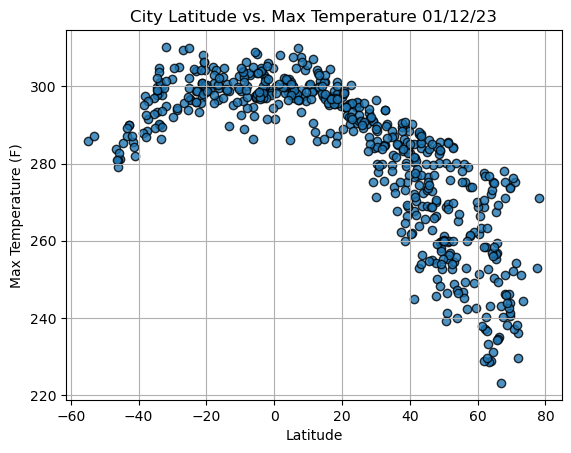

In [16]:
import time 

# Build the scatter plot for latitude vs max temp 
plt.scatter(lats, 
            max_temps, 
            edgecolors= 'black', linewidths= 1, marker= 'o', 
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph proprties 
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True) 

# Save the figure 
plt.savefig('weather_data/Fig1.png')

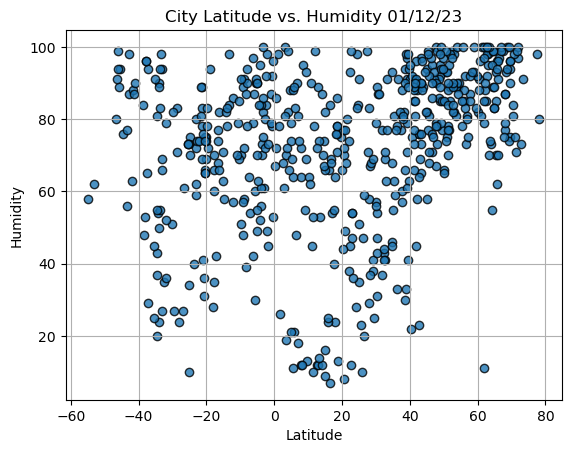

In [17]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats, 
            humidity, 
            edgecolors= 'black', linewidths= 1, marker= 'o', 
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph proprties 
plt.title(f'City Latitude vs. Humidity ' + time.strftime("%x"))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True) 

# Save the figure 
plt.savefig('weather_data/Fig2.png')

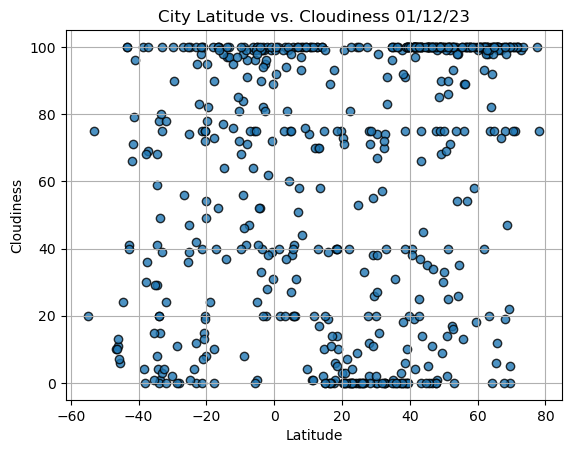

In [18]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats, 
            cloudiness, 
            edgecolors= 'black', linewidths= 1, marker= 'o', 
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph proprties 
plt.title(f'City Latitude vs. Cloudiness ' + time.strftime("%x"))
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True) 

# Save the figure 
plt.savefig('weather_data/Fig3.png')

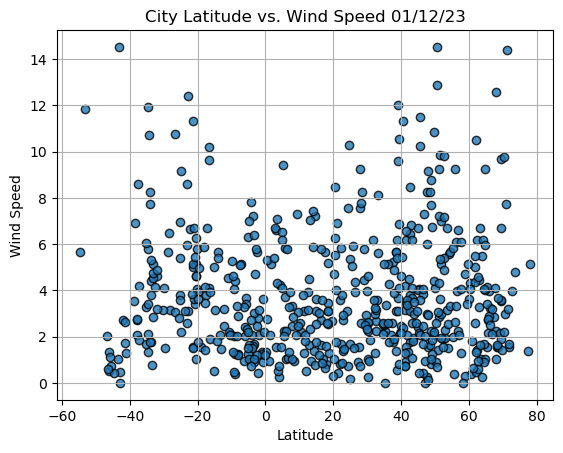

In [19]:
# Build the scatter plot for latitude vs Wind speed
plt.scatter(lats, 
            wind_speed, 
            edgecolors= 'black', linewidths= 1, marker= 'o', 
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph proprties 
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime("%x"))
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True) 

# Save the figure 
plt.savefig('weather_data/Fig4.png')